In [ ]:
#Model to predict the type of car based on its silhoutes dimensional parameters.

**1. Data Understanding & Cleaning:**

In [28]:
#Read ‘vehicle.csv’ and save as DataFrame
df1 = pd.read_csv("vehicle.csv")
df1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [29]:
df1.shape

(846, 19)

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [31]:
#Check percentage of missing values and impute with correct approach
#using the function to check missing values created in part A
print("The percentage of missing values for the dataframe is as follows,")
print(missing_values_as_perc(df1))

The percentage of missing values for the dataframe is as follows,
compactness                    0.00
circularity                    0.59
distance_circularity           0.47
radius_ratio                   0.71
pr.axis_aspect_ratio           0.24
max.length_aspect_ratio        0.00
scatter_ratio                  0.12
elongatedness                  0.12
pr.axis_rectangularity         0.35
max.length_rectangularity      0.00
scaled_variance                0.35
scaled_variance.1              0.24
scaled_radius_of_gyration      0.24
scaled_radius_of_gyration.1    0.47
skewness_about                 0.71
skewness_about.1               0.12
skewness_about.2               0.12
hollows_ratio                  0.00
class                          0.00
dtype: float64


In [32]:
#imputing the missing values
#As there are few missing values we will drop the missing value rows
df2=df1.copy()
df2.dropna(inplace=True)

In [33]:
print(missing_values_as_perc(df2))

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64


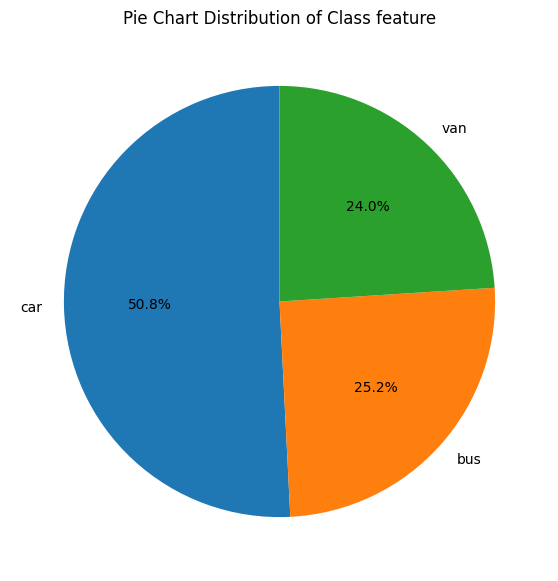

Percentage of Values for 'class' Variable:
class
car    50.799508
bus    25.215252
van    23.985240
Name: proportion, dtype: float64


In [34]:
#Visualize a Pie-chart and print percentage of values for variable ‘class’
#calculating percentage distribution of class feature
class_perc = df2["class"].value_counts(normalize=True)*100
#plotting pie chart
plt.figure(figsize=(7,7))
plt.pie(class_perc,labels=class_perc.index,autopct='%1.1f%%',startangle=90)
plt.title("Pie Chart Distribution of Class feature")
plt.show()

#percentage values of class feature
print("Percentage of Values for 'class' Variable:")
print(class_perc)

In [35]:
#Check for duplicate rows in the data and impute with correct approach.
duplicates=df2.duplicated().sum()
print(f"There is {duplicates} duplicated data in the dataframe.")

There is 0 duplicated data in the dataframe.


**2. Data Preparation**

In [36]:
#Split data into X and Y. [Train and Test optional]
from sklearn.model_selection import train_test_split
X=df2.drop("class",axis=1)
y=df2["class"]

In [37]:
#Standardize the Data.
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

**3. Model Building:**

In [38]:
#Train a base Classification model using SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)
y_train_predicted=svm_model.predict(X_train)
y_test_predicted = svm_model.predict(X_test)

In [39]:
#Print Classification metrics for train data.
train_accuracy = accuracy_score(y_train,y_train_predicted)
test_accuracy = accuracy_score(y_test,y_test_predicted)
print(f"Training accuracy score:{round(train_accuracy*100,2)}%")
print(f"Testing accuracy score:{round(test_accuracy*100,2)}%")
print("Classification Metrics for Training Data:")
print(classification_report(y_train, y_train_predicted))
print("Classification Metrics for Training Data:")
print(classification_report(y_train, y_train_predicted))


Training accuracy score:96.31%
Testing accuracy score:96.32%
Classification Metrics for Training Data:
              precision    recall  f1-score   support

         bus       0.94      0.97      0.96       169
         car       0.97      0.96      0.96       316
         van       0.96      0.97      0.97       165

    accuracy                           0.96       650
   macro avg       0.96      0.97      0.96       650
weighted avg       0.96      0.96      0.96       650

Classification Metrics for Training Data:
              precision    recall  f1-score   support

         bus       0.94      0.97      0.96       169
         car       0.97      0.96      0.96       316
         van       0.96      0.97      0.97       165

    accuracy                           0.96       650
   macro avg       0.96      0.97      0.96       650
weighted avg       0.96      0.96      0.96       650



In [40]:
#Apply PCA on the data with 10 components
from sklearn.decomposition import PCA
n_components=10
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

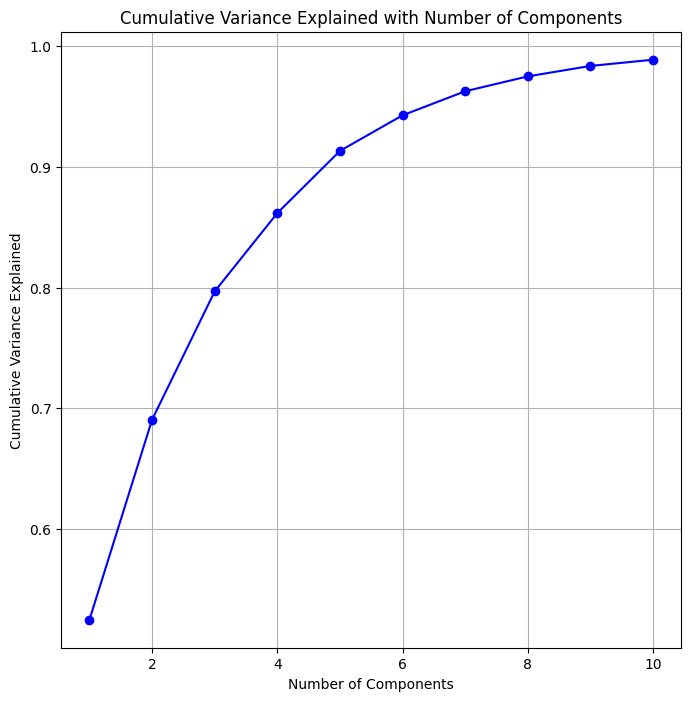

In [41]:
#Visualize Cumulative Variance Explained with Number of Components.
cumulative_variance=pca.explained_variance_ratio_.cumsum()

#Plotting the figure
plt.figure(figsize=(8,8))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Variance Explained with Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()


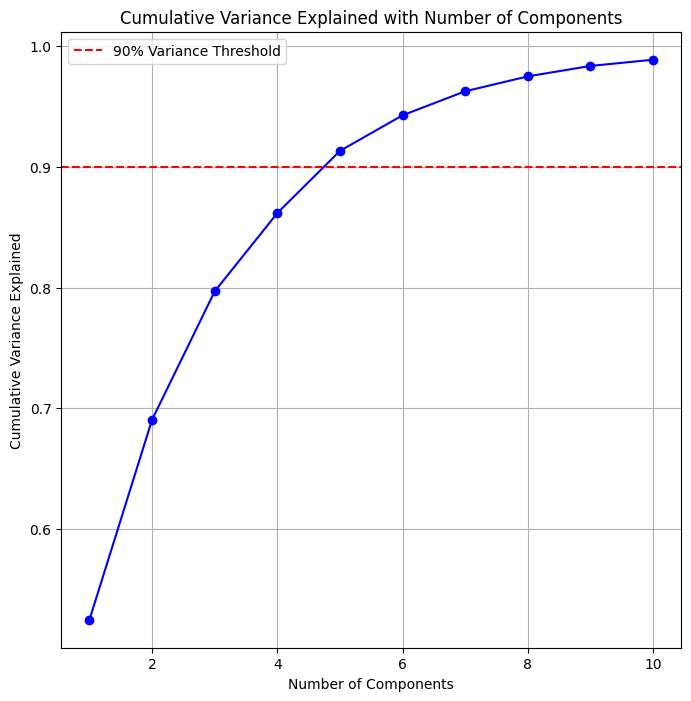

In [42]:
#Draw a horizontal line on the above plot to highlight the threshold of 90%.
#Plotting the figure with a horizontal line at 90%
plt.figure(figsize=(8,8))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.axhline(y=0.9,color='r',linestyle='--',label='90% Variance Threshold')
plt.title('Cumulative Variance Explained with Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
#F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.
#Selecting n_components=8 as it explains well above 90% variance.
pca2 = PCA(n_components=8)
X_pca = pca2.fit_transform(X_scaled)

In [44]:
#Train SVM model on components selected from above step.
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#Initializing SVM model
svm_model2 = SVC(kernel='linear')
svm_model2.fit(X_train, y_train)

SVC(kernel='linear')

In [45]:
#Print Classification metrics for train data of above model and share insights.
y_train_predicted = svm_model2.predict(X_train)
y_test_predicted  = svm_model2.predict(X_test)
#Accuracy of model on train data
train_accuracy = accuracy_score(y_train,y_train_predicted)
test_accuracy = accuracy_score(y_test,y_test_predicted)

print(f"Training Accuracy:{round(train_accuracy*100,2)}%")
print(f"Testing Accuracy:{round(test_accuracy*100,2)}%")

#Classification report
print("Classification Metrics for Training Data:")
print(classification_report(y_train, y_train_predicted))


print("Classification Metrics for Testing Data:")
print(classification_report(y_test, y_test_predicted))

Training Accuracy:87.69%
Testing Accuracy:88.34%
Classification Metrics for Training Data:
              precision    recall  f1-score   support

         bus       0.80      0.84      0.82       169
         car       0.92      0.87      0.90       316
         van       0.88      0.92      0.90       165

    accuracy                           0.88       650
   macro avg       0.87      0.88      0.87       650
weighted avg       0.88      0.88      0.88       650

Classification Metrics for Testing Data:
              precision    recall  f1-score   support

         bus       0.74      0.94      0.83        36
         car       0.99      0.84      0.91        97
         van       0.83      0.97      0.89        30

    accuracy                           0.88       163
   macro avg       0.85      0.92      0.88       163
weighted avg       0.90      0.88      0.89       163



**Insights**  
*1) Training Accuracy has dropped considerably from 96% to 88%.*  
*2) Recall is having similar effects after applying PCA on data.*  
*3) The Train and Test accuracy of base model is good compared to PCA applied model.*

**4. Performance Improvement**

In [46]:
#Train another SVM on the components out of PCA. Tune the parameters to improve performance.
from sklearn.model_selection import GridSearchCV
#parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly'],
}
#initializing  SVM model
svm_model3 = SVC()
#initializing grid_search
grid_search = GridSearchCV(svm_model3, param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params=grid_search.best_params_
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train, y_train)

SVC(C=100, gamma=0.01)

In [47]:
#Share best Parameters observed from above step.
#Best params
print("Best parameters:", best_params)



Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [48]:
#Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.
#predicting on best model
y_train_predicted = best_svm_model.predict(X_train)
y_test_predicted = best_svm_model.predict(X_test)

# Evaluating the model
train_accuracy = accuracy_score(y_train, y_train_predicted)
test_accuracy = accuracy_score(y_test, y_test_predicted)
print(f"Training Accuracy of the tuned SVM model:{round(train_accuracy*100,2)}%")
print(f"Testing Accuracy of the tuned SVM model:{round(test_accuracy*100,2)}%")

#Classification report
print("Classification Metrics for Training Data:")
print(classification_report(y_train, y_train_predicted))


print("Classification Metrics for Testing Data:")
print(classification_report(y_test, y_test_predicted))

Training Accuracy of the tuned SVM model:97.23%
Testing Accuracy of the tuned SVM model:97.55%
Classification Metrics for Training Data:
              precision    recall  f1-score   support

         bus       0.98      0.98      0.98       169
         car       0.99      0.97      0.98       316
         van       0.94      0.97      0.96       165

    accuracy                           0.97       650
   macro avg       0.97      0.97      0.97       650
weighted avg       0.97      0.97      0.97       650

Classification Metrics for Testing Data:
              precision    recall  f1-score   support

         bus       0.95      1.00      0.97        36
         car       1.00      0.96      0.98        97
         van       0.94      1.00      0.97        30

    accuracy                           0.98       163
   macro avg       0.96      0.99      0.97       163
weighted avg       0.98      0.98      0.98       163



**Insights**  
*1) We have created 3 models as Base SVM model(Base Model), SVM model with PCA(Model2) and Hypertuned SVM model with PCA(Best Model). Among these models Base model shows 96% accuracy in both training and testing data. Model2 based on PCA components shows reduced accuracy as 87% and 88% respectively and Hypertuned model shows best accuracy of 97% for both training and testing data.*    
*2) Among all these models best recall and precision is shown by the hypertuned model with PCA.*    
  